# <span style="color:orange">AutoML & Association Rule Mining

# 1.0 Objective
In this notebook we will learn:

* **Getting data:** How to import data from the PyCaret repository?
* **Environment setup:** How to set up the experiment in PyCaret to start association rule mining?
* **Create model:** How to create a model to evaluate results?
* **Plot Model:** How to analyze the model using multiple plots?

# 2.0 Pycaret

PyCaret is a workflow automation tool for supervised and unsupervised machine learning.

All modules in PyCaret support data preparation (over 25 essential preprocessing techniques, automatic hyperparameter tuning, model analysis and interpretation, automatic model selection, experiment registration, and cloud deployment options)

The PyCaret Association Rules module (pycaret.arules) is a supervised machine learning module used to discover relationships between variables in a data set. This module automatically transforms any transactional database into a form that is acceptable to the algorithm a priori. A priori is an algorithm for frequent item set extraction and association rule learning over relational databases.


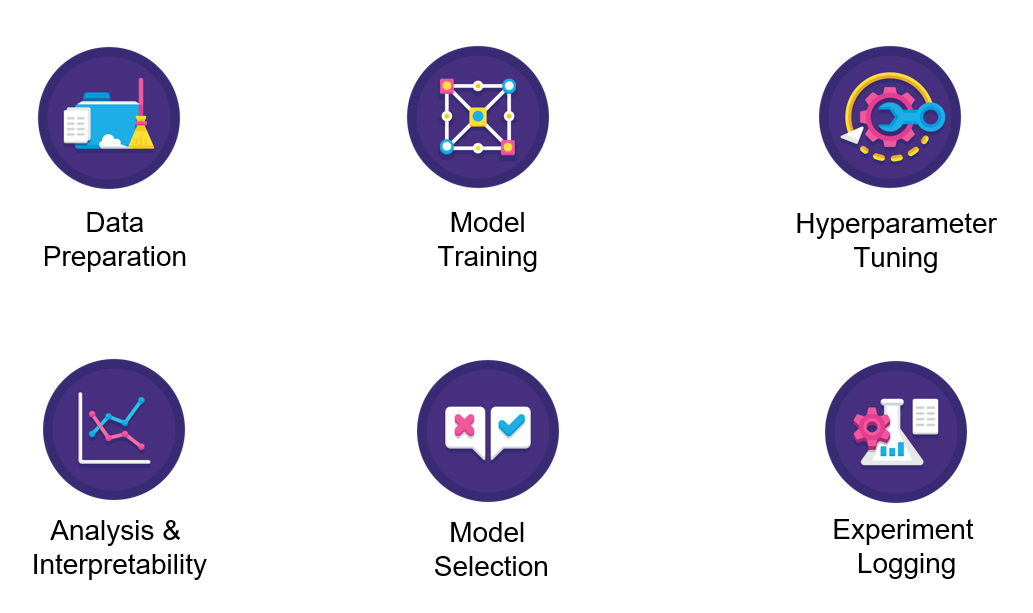

# 3.0 Association Rule Mining

It's a rule-based machine learning technique for discovering interesting relationships between variables in a database. It's goal is to identify robust rules using measures of interest. Some common business use cases for association rule mining are:

- Analysis of the shopping basket to understand which items are frequently bought together.
- Medical diagnosis to help doctors determine the probability of disease occurrence given factors and symptoms.


For example, the rule {onions, potatoes} -> {hamburger} found in supermarket sales data would indicate that if a customer buys onions and potatoes together, they are likely to also buy hamburgers. Such information may be used as the basis for decisions about marketing activities, such as promotional pricing or product placements.

Now let's see how exactly an association rule looks like. It consists of an antecedent and a consequent, which are a list of elements. Note that the implication here is co-occurrence and not causation. For a given rule, itemset is the list of all antecedent and consequent items.

There are several metrics to help us understand the strength of the association between elements:
1. **Support** . This indicates how popular an item set is, measured by the proportion of transactions in which an item set appears.
2. **Confidence** . This indicates the probability that item Y will be purchased when item X is purchased, expressed as {X -> Y}.
3. **Lift**. This indicates the probability that item Y will be purchased when item X is purchased, while controlling for the popularity of item Y

![ChessUrl](https://annalyzin.files.wordpress.com/2016/04/association-rules-apriori-tutorial-explanation.gif "Association")

# 4.0 Dataset 

We will use a small sample of the UCI dataset called the **Retail Dataset**. This is a transactional dataset containing transactions occurring between 12/01/2010 and 12/09/2011 for a registered online retailer based in the UK. The company primarily sells unique gifts for all occasions. Many of the company's customers are wholesalers. The brief description of the attributes is as follows:

- **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code begins with the letter 'c', it indicates a cancellation.
- **StockCode:** Product code (item). Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description:** Name of the product (item). Nominal.
- **Quantity:** The quantities of each product (item) per transaction. Numeric.
- **InvoiceData:** Input date and time. Numeric, the day and time each transaction was generated.
- **Unit price:** Unit price. Numeric, Product price per unit in pounds sterling.
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country:** Name of the country. Nominal, the name of the country where each client resides.

#### Acknowledgment of the data set:
Dr. Daqing Chen, Director: Public Analysis Group. chend@lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


# 5.0 Obtaining the Data

In [1]:
import pycaret

In [2]:
from pycaret.datasets import get_data
data = get_data('france')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [3]:
#check the shape of data
data.shape

(8557, 8)

# 6.0 Setting up Environment in PyCaret

`setup()` function initializes the environment in PyCaret and transforms the transactional dataset into a shape that is acceptable to Apriori algorithm. It requires three mandatory parameters: pandas dataframe, `transaction_id` which is the name of column representing transaction id and will be used to pivot the matrix; and `item_id` which is the name of the column used for creation of rules. Normally, this will be the variable of interest. You can also pass an optional parameter `ignore_items` to ignore certain values for creation of rule.

In [4]:
from pycaret.arules import *

In [5]:
exp_arul101 = setup(data = data, 
                    transaction_id = 'InvoiceNo',
                    item_id = 'Description') 

Description,Value
session_id,2662
# Transactions,461
# Items,1565
Ignore Items,None


Once the setup runs successfully, print the table with:

- **# Transactions:** Unique number of transactions in the data set. In this case, a single `InvoiceNo`. <br/>
<br/>
- **# items:** unique number of items in the dataset. In this case, "Description". <br/>
<br/>
- **Ignore Items:** Items to ignore when mining rules. Many times there are relationships that are too obvious and you may want to ignore them for this discussion. For example: many transactional datasets will contain the shipping cost, which is a very obvious relationship that can be ignored in `setup()` using the ʻignore_items` parameter.

# 7.0 Model Creation

Creating a model of association rules is simple. `create_model()` does not require any required parameters. It has 4 optional parameters which are as follows:

- **metric:** metric to evaluate if a rule is of interest. The default value is 'trust'. Other available metrics include 'support', 'lift', 'leverage', 'conviction'. <br/>
<br/>
- **threshold:** minimum threshold for the evaluation metric, through the `metric` parameter, to decide if a candidate rule is of interest. The default value is "0.5". <br/>
<br/>
- **min_support:** A value between 0 and 1 for the minimum support of the returned item sets. Support is calculated as the fraction `transactions_where_item(s) _occur / total_transactions`. The default value is "0.05". <br/>
<br/>
- **rounding:** The number of decimal metrics in the scoring grid will be rounded to. <br/>

In [6]:
#model created and stored in model1 variable.
model1 = create_model(metric = 'lift',threshold=0.6,min_support=0.06, round=2 )

In [7]:
print(model1.shape) #141 rules created.

(142, 9)


In [8]:
model1.head() #see the rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED ),0.07,0.08,0.06,0.85,10.57,0.05,6.07
1,(ALARM CLOCK BAKELIKE RED ),"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",0.08,0.07,0.06,0.76,10.57,0.05,3.82
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.08,0.08,0.07,0.79,9.90,0.06,4.48
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.08,0.08,0.07,0.84,9.90,0.06,5.64
4,"(POSTAGE, ALARM CLOCK BAKELIKE RED )",(ALARM CLOCK BAKELIKE GREEN),0.07,0.08,0.06,0.82,9.73,0.05,5.19


# 8.0 Setup with `ignore_items`

In the `model1` created above, notice that rule number 1 is from `JUMBO BAG WOODLAND ANIMALS` with `POSTAGE` which is very obvious. In the following example, we will use the ʻignore_items` parameter in setup()` to ignore `POSTAGE` from the dataset and recreate the association rules model.

In [9]:
exp_arul101 = setup(data = data, 
                    transaction_id = 'InvoiceNo',
                    item_id = 'Description',
                    ignore_items = ['POSTAGE']) 

Description,Value
session_id,2236
# Transactions,461
# Items,1565
Ignore Items,['POSTAGE']


In [10]:
model2 = create_model(metric='lift')

In [11]:
print(model2.shape) #notice how only 45 rules are created vs. 141 above.

(52, 9)


In [12]:
model2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CHILDRENS CUTLERY DOLLY GIRL ),(CHILDRENS CUTLERY SPACEBOY ),0.0629,0.0586,0.0542,0.8621,14.7190,0.0505,6.8254
1,(CHILDRENS CUTLERY SPACEBOY ),(CHILDRENS CUTLERY DOLLY GIRL ),0.0586,0.0629,0.0542,0.9259,14.7190,0.0505,12.6508
2,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",(ALARM CLOCK BAKELIKE RED ),0.0629,0.0803,0.0542,0.8621,10.7409,0.0492,6.6681
3,(ALARM CLOCK BAKELIKE RED ),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.0803,0.0629,0.0542,0.6757,10.7409,0.0492,2.8894
4,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",0.0846,0.0629,0.0542,0.6410,10.1901,0.0489,2.6105


# 9.0 Visualizing the Model

In [13]:
plot_model(model2, plot='2d')

In [14]:
plot_model(model1, plot='3d')

# Using Power BI to analyze Retail Sales

### Connect Power BI to the database located in Github

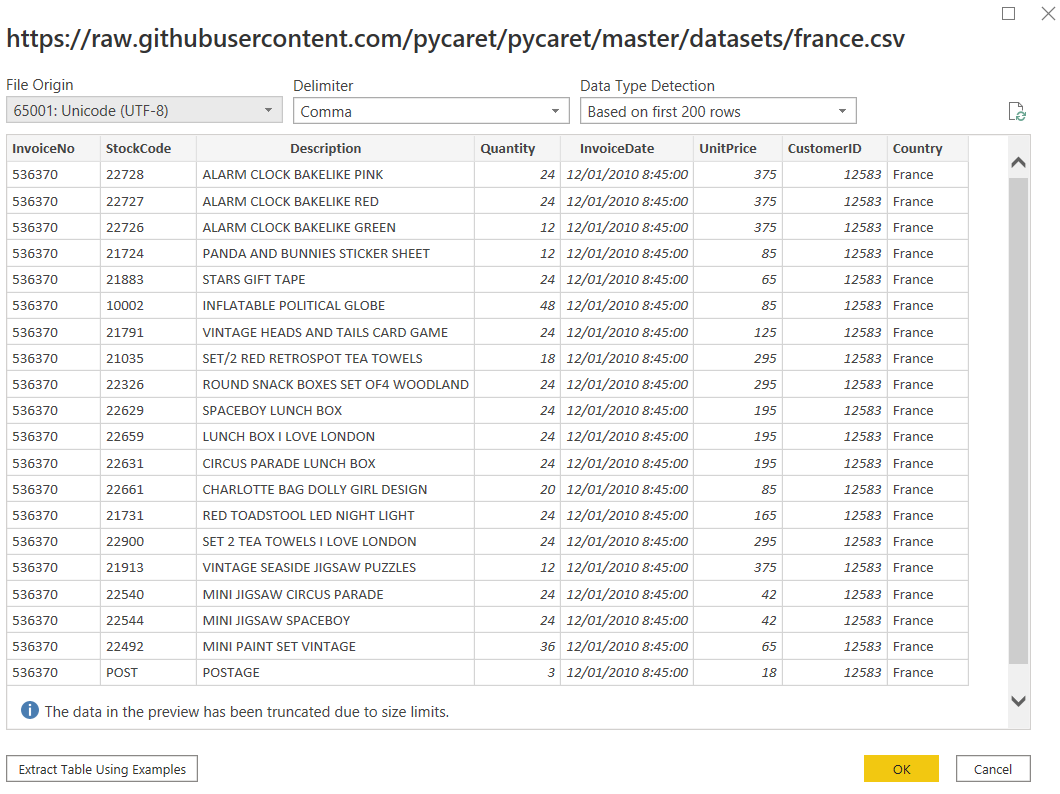

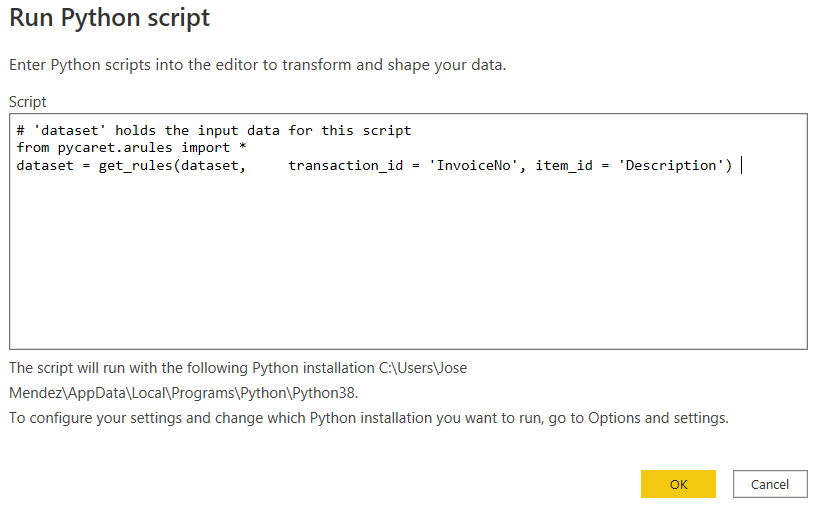

### We obtained the transformed data

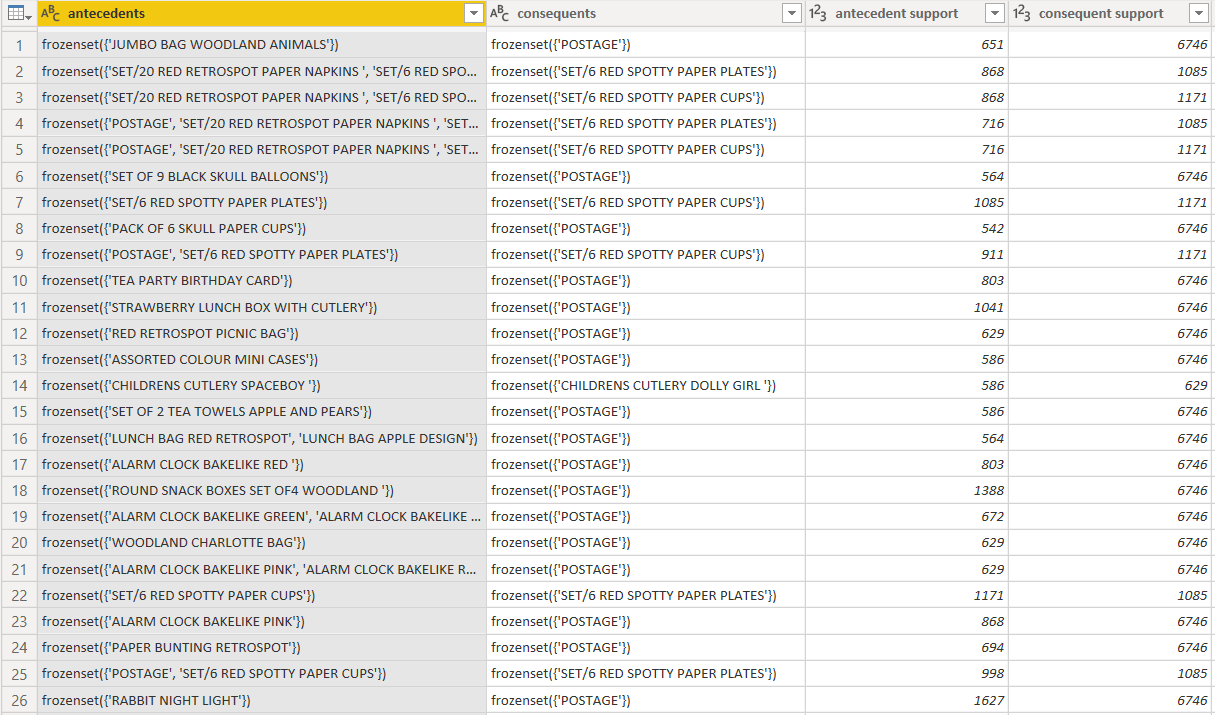

Now we can began to anylize the data

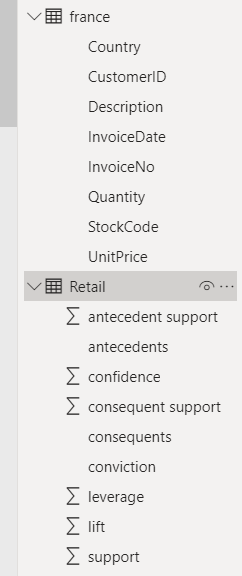

We must ask ourselves the following questions in order to increase the sales of this Retail store. What is the profitability per customer? Which customer has the highest profitability? What is this customer buying? In this way we can apply promotions to this type of client to maintain it over time and increase sales.

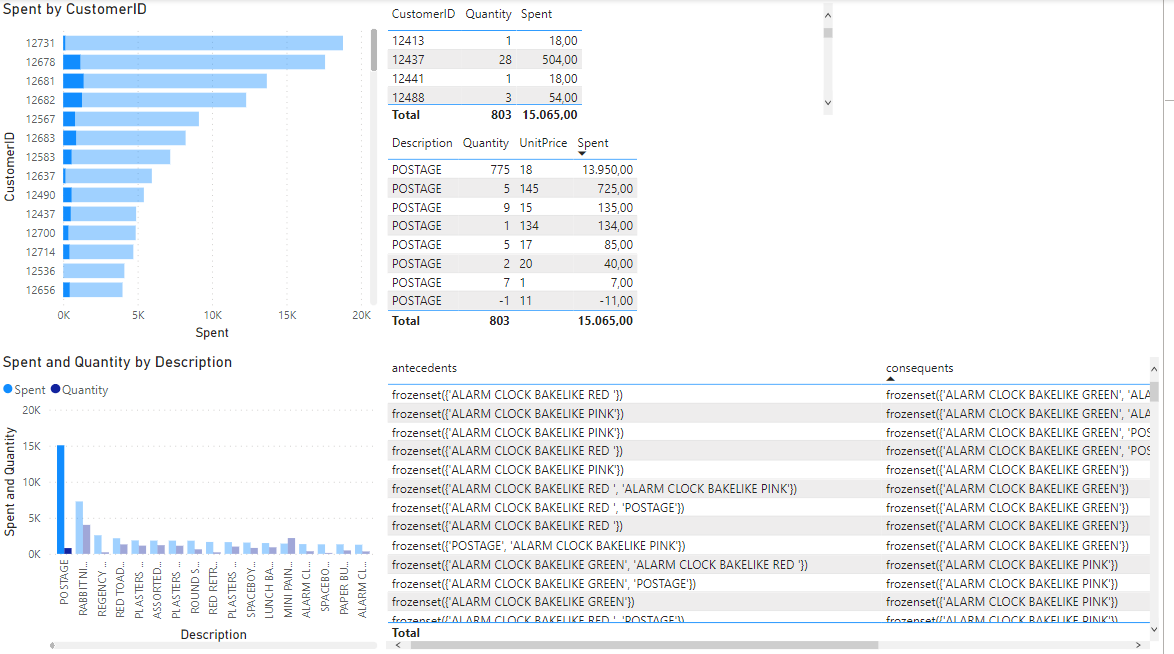